<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
import datetime

SID = 'BTC-USD'#'^TWII'
df = web.DataReader(SID,'yahoo',start="2000-01-01")
df = df.iloc[:,:5]
df

,High,Low,Open,Close,Volume
Date,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100
...,...,...,...,...,...
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025


In [87]:
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [88]:
print(df.shape)
df.head(3)

(2857, 5)


,High,Low,Open,Close,Volume
Date,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700


In [89]:
df.tail(3)

,High,Low,Open,Close,Volume
Date,,,,,
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352


In [90]:
df.dtypes

High      float64
Low       float64
Open      float64
Close     float64
Volume      int64
dtype: object

# Labeling(計算return)

In [91]:
#今天股價 = df['Close']
#昨天股價 = df['Close'].shift(1)
#df['return%'] = (今天股價/昨天股價-1)*100
#print(df['return%'].min(),df['return%'].max())
#sns.distplot(df['return%'].dropna())
#df.tail()

# Label triple_barrier

In [92]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,7)['triple_barrier_signal']
df = df.join(ret)

In [93]:
df.tail(20)

,High,Low,Open,Close,Volume,triple_barrier_signal
Date,,,,,,
2022-06-24,21472.917969,20777.511719,21084.648438,21231.656250,24957784918,-1
2022-06-25,21520.914062,20964.585938,21233.609375,21502.337891,18372538715,-1
2022-06-26,21783.724609,21016.269531,21496.494141,21027.294922,18027170497,-1
2022-06-27,21478.089844,20620.199219,21028.238281,20735.478516,20965695707,-1
2022-06-28,21164.423828,20228.812500,20731.544922,20280.634766,21381535161,-1
2022-06-29,20364.156250,19937.791016,20281.169922,20104.023438,23552740328,-1
2022-06-30,20141.160156,18729.656250,20108.312500,19784.726562,26267239923,1
2022-07-01,20632.671875,19073.708984,19820.470703,19269.367188,30767551159,1
2022-07-02,19371.748047,19027.082031,19274.835938,19242.255859,18100418740,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


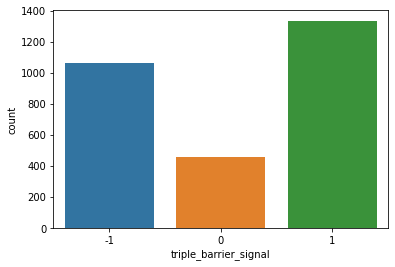

In [94]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

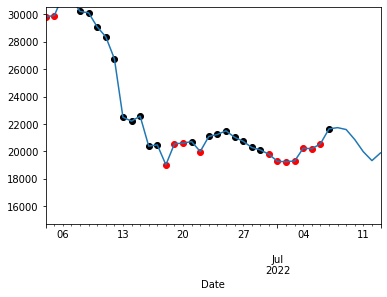

In [95]:
import matplotlib.pyplot as plt
buy = df[df['triple_barrier_signal']==1]['Close']
sell = df[df['triple_barrier_signal']==-1]['Close']
df['Close'][-40:].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
lb = df['Close'][-40:].mean() - 2*df['Close'][-40:].std()
ub = df['Close'][-40:].mean() + 2*df['Close'][-40:].std()
plt.ylim(lb,ub)
plt.show()

# 建立ohlcv

In [96]:
#!pip install finta

In [97]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    2856.000000
mean       53.109081
std        14.372873
min         0.000000
25%        42.895170
50%        52.175574
75%        62.481265
max        94.302215
Name: RSI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874


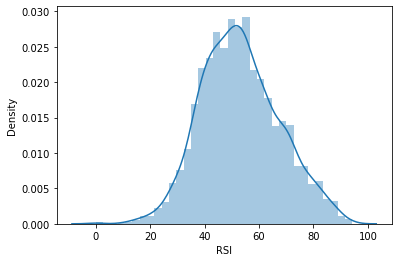

In [98]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    2844.000000
mean      -45.011485
std        30.010892
min      -100.000000
25%       -70.893733
50%       -44.347905
75%       -16.225225
max        -0.000000
Name: Williams %R, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834


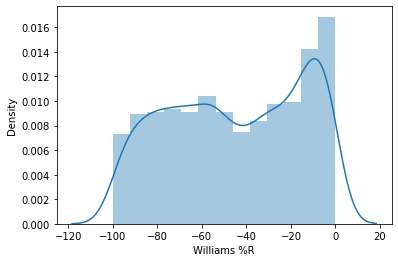

In [99]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     2817.000000
mean     12483.360753
std      16490.374968
min        229.204391
25%        640.520951
50%       6707.583151
75%      11226.528725
max      61742.859184
Name: SMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206


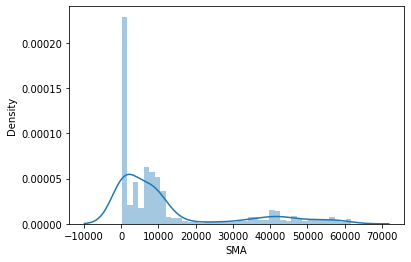

In [100]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     2857.000000
mean     12430.190837
std      16524.550099
min        220.642671
25%        633.454273
50%       6579.080104
75%      11516.944438
max      64522.768642
Name: EMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575


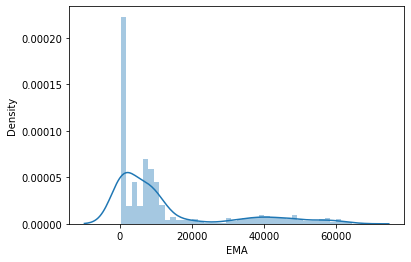

In [101]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     2849.000000
mean     12473.351782
std      16555.098908
min        209.385420
25%        642.907912
50%       6584.262207
75%      11567.935460
max      65055.434201
Name: WMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816


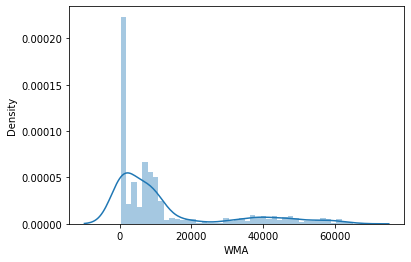

In [102]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     2839.000000
mean     12530.195764
std      16613.640665
min        188.549518
25%        649.209095
50%       6589.540200
75%      11743.894173
max      65934.391033
Name: HMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887


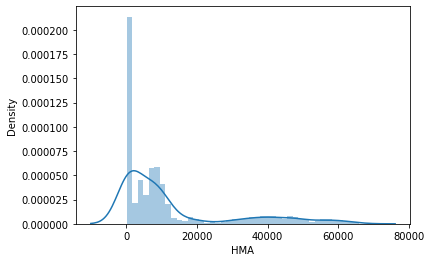

In [103]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     2857.000000
mean     12458.134658
std      16574.715547
min        192.146277
25%        636.709613
50%       6556.034876
75%      11633.060293
max      66242.200165
Name: TEMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650


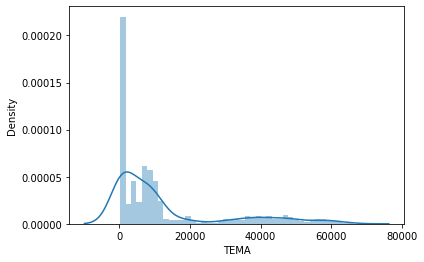

In [104]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2856.000000
mean       16.692800
std       115.612720
min      -483.811446
25%       -67.264211
50%        20.561722
75%       104.656347
max       498.828664
Name: CCI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747


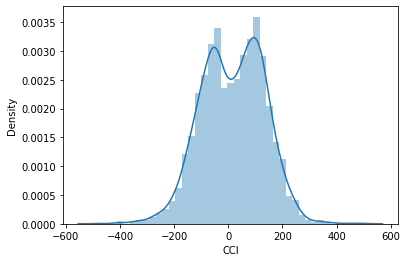

In [105]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2856.000000
mean        6.548719
std        32.579611
min      -100.000000
25%       -17.058161
50%         4.135213
75%        28.692056
max        94.629713
Name: CMO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482


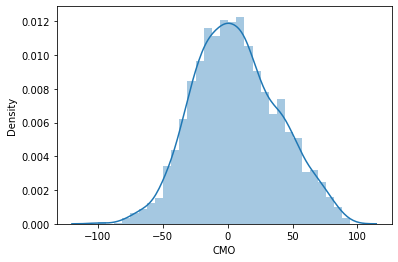

In [106]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2857.000000
mean       -1.664269
std       269.979119
min     -1694.518206
25%       -26.674866
50%         0.558730
75%        38.049286
max      1305.313389
Name: MACD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459,553.945785
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055,503.268941
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647,401.313810
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847,287.172069
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482,247.723465


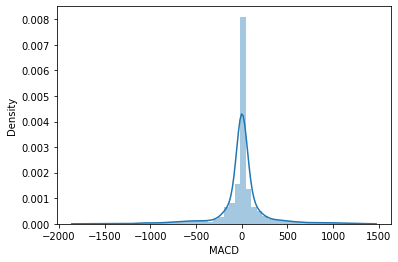

In [107]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2857.000000
mean       -0.007196
std         1.300511
min        -5.521671
25%        -0.744718
50%         0.012175
75%         0.767486
max         4.956753
Name: PPO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459,553.945785,2.348563
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055,503.268941,2.142875
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647,401.313810,1.687479
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847,287.172069,1.164946
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482,247.723465,0.996523


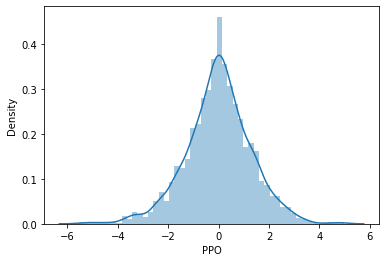

In [108]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    2845.000000
mean        2.648236
std        14.415407
min       -43.465112
25%        -5.477038
50%         1.410477
75%         9.532731
max       103.615769
Name: ROC, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459,553.945785,2.348563,4.131704
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055,503.268941,2.142875,2.858956
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647,401.313810,1.687479,-0.663881
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847,287.172069,1.164946,-2.329133
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482,247.723465,0.996523,3.189030


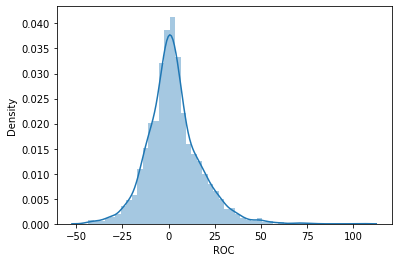

In [109]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    2.848000e+03
mean     1.684610e+14
std      4.808958e+14
min     -9.164593e+14
25%     -5.692829e+09
50%      2.779658e+10
75%      1.233373e+14
max      2.722433e+15
Name: CFI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459,553.945785,2.348563,4.131704,-8.998566e+14
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055,503.268941,2.142875,2.858956,-9.004615e+14
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647,401.313810,1.687479,-0.663881,-9.048639e+14
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847,287.172069,1.164946,-2.329133,-9.115004e+14
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482,247.723465,0.996523,3.189030,-9.136900e+14


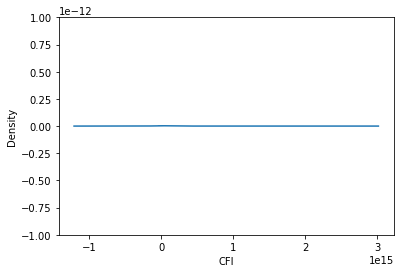

In [110]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    2844.000000
mean        6.234601
std        23.846646
min       -81.370869
25%        -9.555113
50%         4.547291
75%        19.678014
max       107.572296
Name: DMI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459,553.945785,2.348563,4.131704,-8.998566e+14,6.956722
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055,503.268941,2.142875,2.858956,-9.004615e+14,1.021402
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647,401.313810,1.687479,-0.663881,-9.048639e+14,-5.087956
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847,287.172069,1.164946,-2.329133,-9.115004e+14,-9.428661
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482,247.723465,0.996523,3.189030,-9.136900e+14,-11.020997


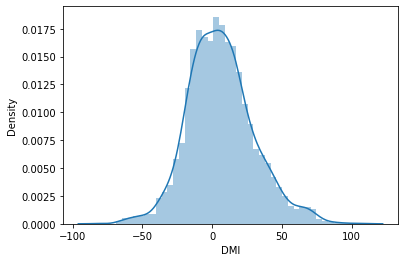

In [111]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count     2857.000000
mean     12400.619439
std      16637.355551
min       -721.310137
25%        625.258659
50%       6515.350379
75%      12067.081055
max      68789.625000
Name: SAR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-09,21877.138672,21445.957031,21716.828125,21592.207031,29641127858,0,47.408214,-20.158351,23872.402439,20882.000647,...,20950.239219,21777.743977,116.790604,10.000459,553.945785,2.348563,4.131704,-8.998566e+14,6.956722,19747.265594
2022-07-10,21591.080078,20727.123047,21591.080078,20860.449219,28688807249,0,42.807924,-40.568382,23607.379478,20877.690362,...,21310.579156,21538.957720,51.871502,-6.722055,503.268941,2.142875,2.858956,-9.004615e+14,1.021402,19952.679659
2022-07-11,20856.353516,19924.539062,20856.353516,19970.556641,24150249025,0,37.981174,-65.389074,23319.044017,20696.263617,...,21375.281071,20925.278314,-26.452062,-22.617647,401.313810,1.687479,-0.663881,-9.048639e+14,-5.087956,22314.941406
2022-07-12,20043.445312,19308.531250,19970.474609,19323.914062,25810220018,0,34.901621,-83.425089,23063.552163,20421.793706,...,21133.987527,20201.995672,-88.713700,-31.976847,287.172069,1.164946,-2.329133,-9.115004e+14,-9.428661,22314.941406
2022-07-13,19950.150391,18999.953125,19306.906250,19883.873047,31825764352,0,39.477874,-67.806834,22805.415206,20314.209575,...,20789.909887,20012.363650,-75.478747,-18.219482,247.723465,0.996523,3.189030,-9.136900e+14,-11.020997,22194.685000


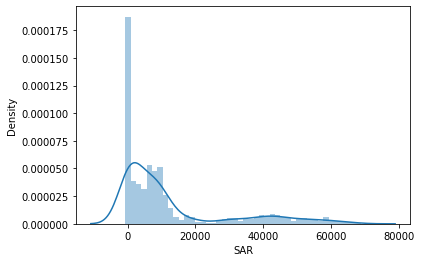

In [112]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [113]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2857, 21)
(2817, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-07-09,47.408214,-20.158351,23872.402439,20882.000647,20898.936068,20950.239219,21777.743977,116.790604,10.000459,553.945785,2.348563,4.131704,-8.998566e+14,6.956722,19747.265594,0
2022-07-10,42.807924,-40.568382,23607.379478,20877.690362,20987.931814,21310.579156,21538.957720,51.871502,-6.722055,503.268941,2.142875,2.858956,-9.004615e+14,1.021402,19952.679659,0
2022-07-11,37.981174,-65.389074,23319.044017,20696.263617,20863.591667,21375.281071,20925.278314,-26.452062,-22.617647,401.313810,1.687479,-0.663881,-9.048639e+14,-5.087956,22314.941406,0
2022-07-12,34.901621,-83.425089,23063.552163,20421.793706,20593.738542,21133.987527,20201.995672,-88.713700,-31.976847,287.172069,1.164946,-2.329133,-9.115004e+14,-9.428661,22314.941406,0
2022-07-13,39.477874,-67.806834,22805.415206,20314.209575,20435.280816,20789.909887,20012.363650,-75.478747,-18.219482,247.723465,0.996523,3.189030,-9.136900e+14,-11.020997,22194.685000,0


# 相關性分析

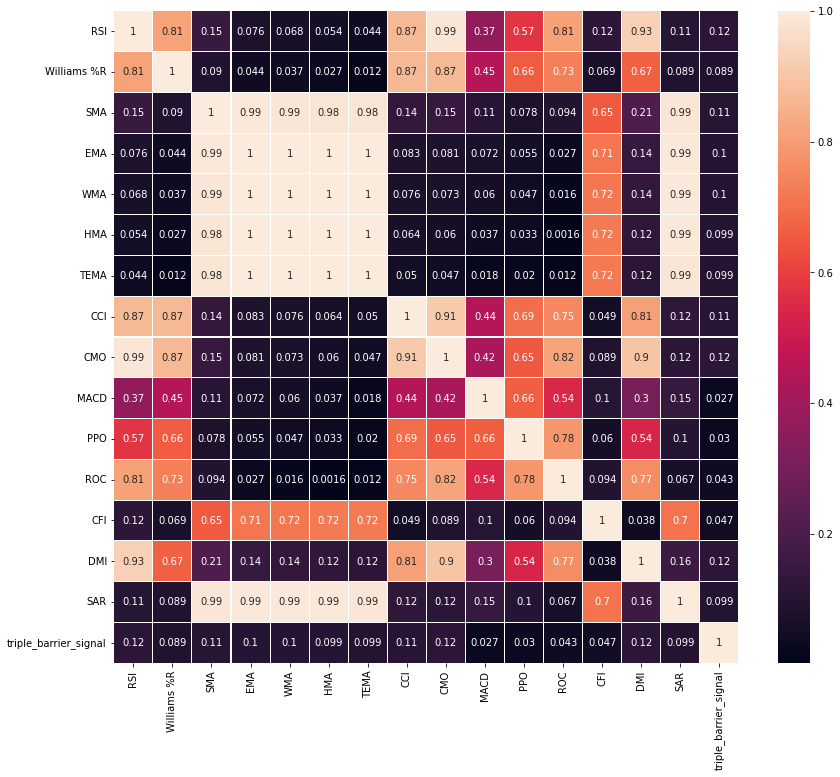

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [115]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,
                         index = df.index,
                         columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-07-09,0.444265,0.798416,0.384357,0.321317,0.319056,0.315787,0.326807,0.611213,0.530299,0.749530,0.751089,0.323610,0.004563,0.422375,0.287709,0
2022-07-10,0.389748,0.594316,0.380049,0.321250,0.320429,0.321268,0.323191,0.545147,0.437487,0.732637,0.731460,0.314956,0.004396,0.388301,0.290693,0
2022-07-11,0.332547,0.346109,0.375361,0.318428,0.318511,0.322252,0.313900,0.465439,0.349265,0.698650,0.687999,0.291005,0.003187,0.353228,0.325002,0
2022-07-12,0.296051,0.165749,0.371208,0.314160,0.314350,0.318582,0.302950,0.402078,0.297321,0.660601,0.638132,0.279683,0.001363,0.328308,0.325002,0
2022-07-13,0.350284,0.321932,0.367011,0.312487,0.311906,0.313348,0.300079,0.415547,0.373675,0.647450,0.622059,0.317201,0.000761,0.319166,0.323256,0


In [116]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [117]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(b_index ,f_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,
                 df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2803/2803 [00:03<00:00, 898.51it/s]

準備完成


# check

In [118]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2803
第一筆的index開始和結束:2014-10-27-2014-11-10
最後一筆的index開始和結束:2022-06-29-2022-07-13


# Reshape X

(圖片數量,長,寬,1張)

In [119]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2803, 15, 15)
(2803, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [120]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(2803, 1)
[[ 1]
 [ 1]
 [-1]
 [-1]
 [-1]]
(2803, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Visualization

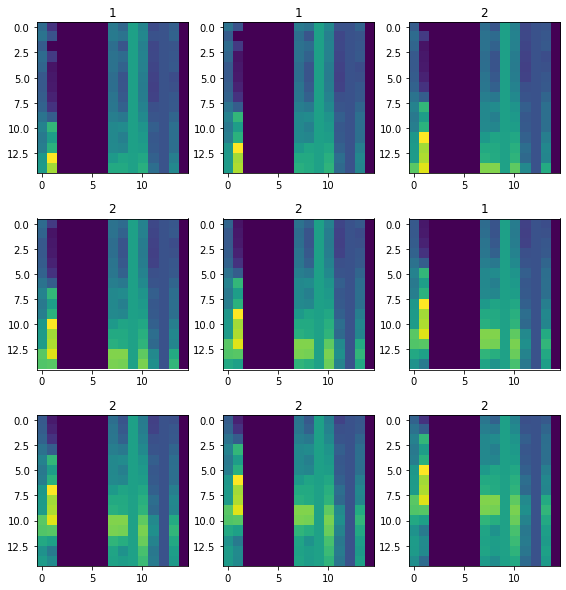

In [121]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [122]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2763, 15, 15, 1) (2763, 3) (40, 15, 15, 1)


# 調整採樣

In [123]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2763, 225)
(2763,)
0    450
1    450
2    450
Name: 0, dtype: int64
(1350, 15, 15, 1)
(1350, 3)


# Split training and val sets

In [124]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X_train,
                                              y_train, 
                                              test_size = 0.2,
                                              random_state = 42,
                                              shuffle = True,#是否洗牌
                                              stratify = y_train #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1080, 15, 15, 1) (1080, 3) (270, 15, 15, 1) (270, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [125]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1311
2    1036
0     456
dtype: int64

In [126]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    450
1    450
2    450
dtype: int64

In [127]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

0    360
1    360
2    360
dtype: int64

In [128]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

1    90
0    90
2    90
dtype: int64

# CNN

In [129]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [130]:
model = Sequential()

nclasses = 3 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [131]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [132]:
#1
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc', 
                                 factor=0.5, 
                                 patience = 3, 
                                 verbose = 1, 
                                 min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [133]:
history = model.fit(xtrain,ytrain,
                    batch_size = 128,
                    epochs = 500,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[es])

Epoch 1/500
9/9 [==============================] - 16s 120ms/step - loss: 1.1100 - accuracy: 0.3194 - val_loss: 1.0964 - val_accuracy: 0.3259
Epoch 2/500
9/9 [==============================] - 0s 17ms/step - loss: 1.1056 - accuracy: 0.3333 - val_loss: 1.0967 - val_accuracy: 0.4037
Epoch 3/500
9/9 [==============================] - 0s 20ms/step - loss: 1.0995 - accuracy: 0.3407 - val_loss: 1.0951 - val_accuracy: 0.3333
Epoch 4/500
9/9 [==============================] - 0s 21ms/step - loss: 1.0945 - accuracy: 0.3565 - val_loss: 1.0902 - val_accuracy: 0.4111
Epoch 5/500
9/9 [==============================] - 0s 24ms/step - loss: 1.0862 - accuracy: 0.3815 - val_loss: 1.0837 - val_accuracy: 0.4074
Epoch 6/500
9/9 [==============================] - 0s 14ms/step - loss: 1.0917 - accuracy: 0.3528 - val_loss: 1.0790 - val_accuracy: 0.4370
Epoch 7/500
9/9 [==============================] - 0s 15ms/step - loss: 1.0833 - accuracy: 0.3889 - val_loss: 1.0718 - val_accuracy: 0.4296
Epoch 8/500
9/9 [=

# 訓練過程評估

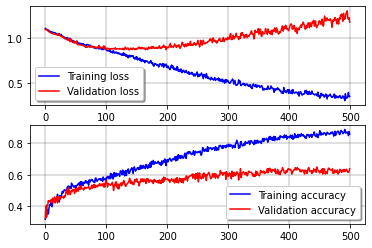

In [134]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

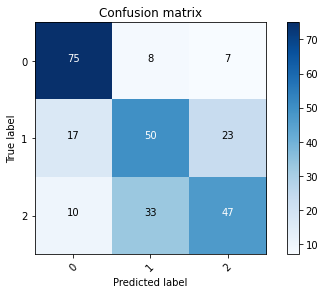

In [135]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [136]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


真實y值

In [137]:
print(yval[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


# 分類報告

In [138]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.6370370370370371

In [139]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.74      0.83      0.78        90
         BUY       0.55      0.56      0.55        90
        SELL       0.61      0.52      0.56        90

   micro avg       0.64      0.64      0.64       270
   macro avg       0.63      0.64      0.63       270
weighted avg       0.63      0.64      0.63       270
 samples avg       0.64      0.64      0.64       270



# plot error

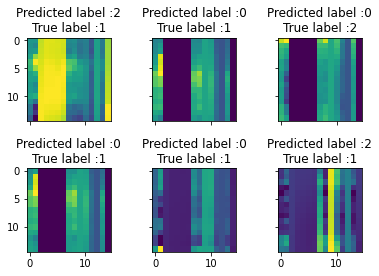

In [140]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [141]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

40


# 0~20筆

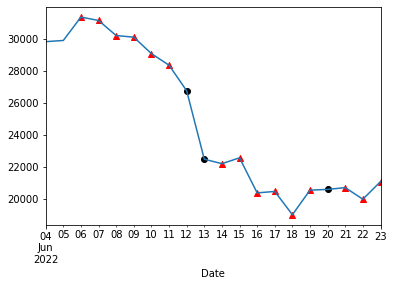

In [142]:
INDEX60 = df[-60:].index
C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = C.loc[INDEX60,:]
C['SIGNAL'] = [np.nan for _ in range(20)] + answer #20個NAN+預測答案
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][20:40].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 20~40筆

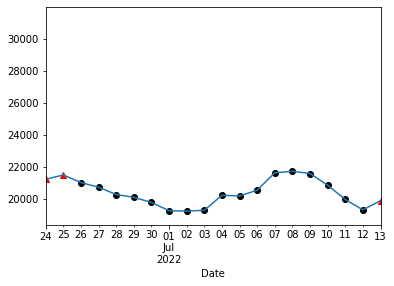

In [143]:
C['Close'][40:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 合併

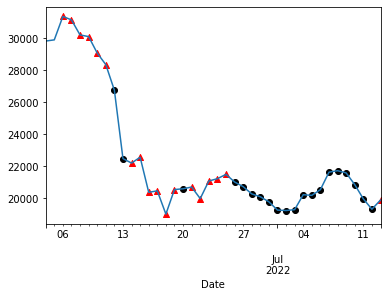

In [144]:
C['Close'][20:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 平滑版本

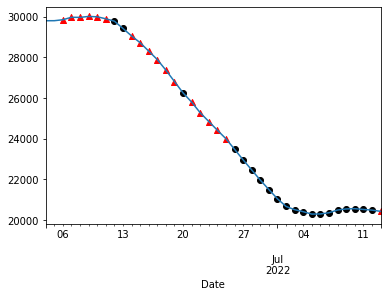

In [145]:
C_roll20 = pd.DataFrame(index=C.index)#空的dataframe index = 倒數60天股票日期
C_roll20['Close'] = C['Close'].rolling(20).mean()#收盤價做20天平滑
C_roll20['SIGNAL'] = C['SIGNAL']
buy = C_roll20[C_roll20['SIGNAL']==1]['Close']#買點
sell= C_roll20[C_roll20['SIGNAL']==2]['Close']#賣點
C_roll20['Close'][20:].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [146]:
C = C.dropna(axis=0)
C

,Close,SIGNAL
Date,,
2022-06-04,29832.914062,0.0
2022-06-05,29906.662109,0.0
2022-06-06,31370.671875,1.0
2022-06-07,31155.478516,1.0
2022-06-08,30214.355469,1.0
2022-06-09,30111.998047,1.0
2022-06-10,29083.804688,1.0
2022-06-11,28360.810547,1.0
2022-06-12,26762.648438,2.0


In [147]:
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.tail(40)

,Close,SIGNAL,HOLD%,BUY%,SELL%
Date,,,,,
2022-06-04,29832.914062,0.0,9.808617e-01,0.002858,0.016280
2022-06-05,29906.662109,0.0,8.388212e-01,0.142555,0.018624
2022-06-06,31370.671875,1.0,9.289852e-02,0.869675,0.037427
2022-06-07,31155.478516,1.0,2.946110e-01,0.635979,0.069410
2022-06-08,30214.355469,1.0,1.630264e-01,0.799688,0.037286
2022-06-09,30111.998047,1.0,5.922842e-02,0.901658,0.039114
2022-06-10,29083.804688,1.0,1.555521e-01,0.787176,0.057272
2022-06-11,28360.810547,1.0,8.859164e-02,0.506068,0.405340
2022-06-12,26762.648438,2.0,1.068002e-02,0.380514,0.608806


In [148]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
#C['Close'].shift()-C['Close'],len(C['Close'].shift()-C['Close'])
勝率(df)

0.6812577065351418

In [149]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
t,len(t)

([0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  1,
  1,
  1,
  1,
  1,
  1,
  -1,
  1,
  1,
  1,
  1,
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  1],
 40)

In [150]:
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

0.6812577065351418 262.4443108974359 0.31874229346485816 -416.30343549679486
178.79220933518292 132.69351180754805


1.3474073215764617

In [151]:
賠率

0.31874229346485816

# save model

In [152]:
model.save('Rikcy_net.h5')
del model

In [153]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)

In [154]:
predict[-5:]

array([[0.00000466, 0.0099503 , 0.990045  ],
       [0.00003347, 0.03021998, 0.96974653],
       [0.00000394, 0.11552826, 0.88446784],
       [0.00000006, 0.22713177, 0.77286816],
       [0.00000002, 0.51798797, 0.48201206]], dtype=float32)